# Data cleaning and exploration
This notebook loads the CSV files from `../data`, normalises column names (lowercase, underscores), inspects missing values and outliers, and produces simple visualisations to guide cleaning decisions.

Run cells sequentially and adapt filling/outlier strategies while you explore (this is an exploratory notebook, not the final pipeline).

In [5]:
!pip install pandas numpy matplotlib seaborn

In [6]:
# Import libraries and find data files
import pandas as pd
import numpy as np
from pathlib import Path
import re
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
%matplotlib inline

data_dir = Path('..') / 'data'
print('data dir:', data_dir.resolve())
files = sorted([p.name for p in data_dir.glob('*.csv')])
print('found CSVs:', files)

# Helper: clean column names to lowercase, underscores, remove special chars
def clean_colnames(cols):
    out = []
    for c in cols:
        if not isinstance(c, str):
            c = str(c)
        c2 = c.strip().lower()
        c2 = re.sub(r'\s+', '_', c2)             # spaces -> _
        c2 = re.sub(r'[^0-9a-zA-Z_]', '_', c2)    # non-alnum -> _
        c2 = re.sub(r'_+', '_', c2)               # collapse multiple underscores
        out.append(c2.strip('_'))
    return out

# Load electricity dataset (exists in attachments)
elec_path = data_dir / 'electricity_demand_2001_2025.csv'
elec = pd.read_csv(elec_path, low_memory=False)
elec.columns = clean_colnames(elec.columns)
print('electricity shape:', elec.shape)

# Load price paid records if present
price_path = data_dir / 'price_paid_records.csv'
price = None
if price_path.exists():
    price = pd.read_csv(price_path, low_memory=False)
    price.columns = clean_colnames(price.columns)
    print('price_paid_records shape:', price.shape)
else:
    print('price_paid_records.csv not found in data dir')

# parse settlement_date to datetime if present
if 'settlement_date' in elec.columns:
    elec['settlement_date'] = pd.to_datetime(elec['settlement_date'], errors='coerce')

# quick peek
elec.head()

data dir: /Users/mauroleonardo/Documents/School_2526/ML/ML_AWS_Challenge/Project/bralma_ML_Project/data
found CSVs: ['demanddata_2001.csv', 'demanddata_2002.csv', 'demanddata_2003.csv', 'demanddata_2004.csv', 'demanddata_2005.csv', 'demanddata_2006.csv', 'demanddata_2007.csv', 'demanddata_2008.csv', 'demanddata_2009.csv', 'demanddata_2010.csv', 'demanddata_2011.csv', 'demanddata_2012.csv', 'demanddata_2013.csv', 'demanddata_2014.csv', 'demanddata_2015.csv', 'demanddata_2016.csv', 'demanddata_2017.csv', 'demanddata_2018.csv', 'demanddata_2019.csv', 'demanddata_2020.csv', 'demanddata_2021.csv', 'demanddata_2022.csv', 'demanddata_2023.csv', 'demanddata_2024.csv', 'demanddata_2025.csv', 'electricity_demand_2001_2025.csv']
electricity shape: (434014, 23)
price_paid_records.csv not found in data dir


,settlement_date,settlement_period,nd,tsd,england_wales_demand,embedded_wind_generation,embedded_wind_capacity,embedded_solar_generation,embedded_solar_capacity,non_bm_stor,...,ifa2_flow,britned_flow,moyle_flow,east_west_flow,nemo_flow,nsl_flow,eleclink_flow,viking_flow,greenlink_flow,year
0,2001-01-01,1,38631,NaN,34060,NaN,NaN,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2001
1,2001-01-01,2,39808,NaN,35370,NaN,NaN,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2001
2,2001-01-01,3,40039,NaN,35680,NaN,NaN,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2001
3,2001-01-01,4,39339,NaN,35029,NaN,NaN,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2001
4,2001-01-01,5,38295,NaN,34047,NaN,NaN,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2001


In [7]:
# Inspect columns and missing values
print('columns:')
print(elec.columns.tolist())

# Missing values per column (descending)
mv = elec.isna().sum().sort_values(ascending=False)
mv[mv>0].head(30)

# Basic datatypes and memory usage
elec.info(verbose=True, show_counts=True)

columns:
['settlement_date', 'settlement_period', 'nd', 'tsd', 'england_wales_demand', 'embedded_wind_generation', 'embedded_wind_capacity', 'embedded_solar_generation', 'embedded_solar_capacity', 'non_bm_stor', 'pump_storage_pumping', 'scottish_transfer', 'ifa_flow', 'ifa2_flow', 'britned_flow', 'moyle_flow', 'east_west_flow', 'nemo_flow', 'nsl_flow', 'eleclink_flow', 'viking_flow', 'greenlink_flow', 'year']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434014 entries, 0 to 434013
Data columns (total 23 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   settlement_date            153502 non-null  datetime64[ns]
 1   settlement_period          434014 non-null  int64         
 2   nd                         434014 non-null  int64         
 3   tsd                        363886 non-null  float64       
 4   england_wales_demand       434014 non-null  int64         
 5   embedded_wind_generatio

describe:


count    434014.000000
mean      30276.803767
std        7677.431497
min           0.000000
25%       24063.000000
50%       29906.000000
75%       36011.750000
max       54430.000000
Name: england_wales_demand, dtype: float64

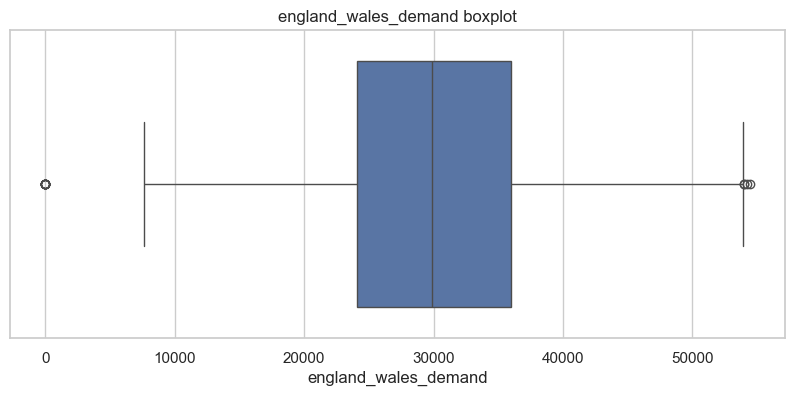

,settlement_date,settlement_period,england_wales_demand
34018,2002-12-10,35,54430
122002,2007-12-17,35,54221
35410,2003-01-08,35,54015
122001,2007-12-17,34,54000
34017,2002-12-10,34,53920
35362,2003-01-07,35,53856
86098,2005-11-29,35,53783
86050,2005-11-28,35,53767
86146,2005-11-30,35,53748
34019,2002-12-10,36,53716


In [8]:
# Example: look at england_wales_demand distribution and outliers if column exists
col = 'england_wales_demand'
if col in elec.columns:
    print('describe:')
    display(elec[col].describe())
    plt.figure(figsize=(10,4))
    sns.boxplot(x=elec[col].dropna())
    plt.title(col + ' boxplot')
    plt.show()

    # Show top 10 largest values and their dates/periods
    display(elec[['settlement_date','settlement_period', col]].sort_values(by=col, ascending=False).head(15))
else:
    print(f'{col} not in dataset columns')

numeric columns used: ['settlement_period', 'nd', 'tsd', 'england_wales_demand', 'embedded_wind_generation', 'embedded_wind_capacity', 'embedded_solar_generation', 'embedded_solar_capacity', 'non_bm_stor', 'pump_storage_pumping', 'scottish_transfer', 'ifa_flow', 'ifa2_flow', 'britned_flow', 'moyle_flow', 'east_west_flow', 'nemo_flow', 'nsl_flow', 'eleclink_flow', 'viking_flow', 'greenlink_flow', 'year']


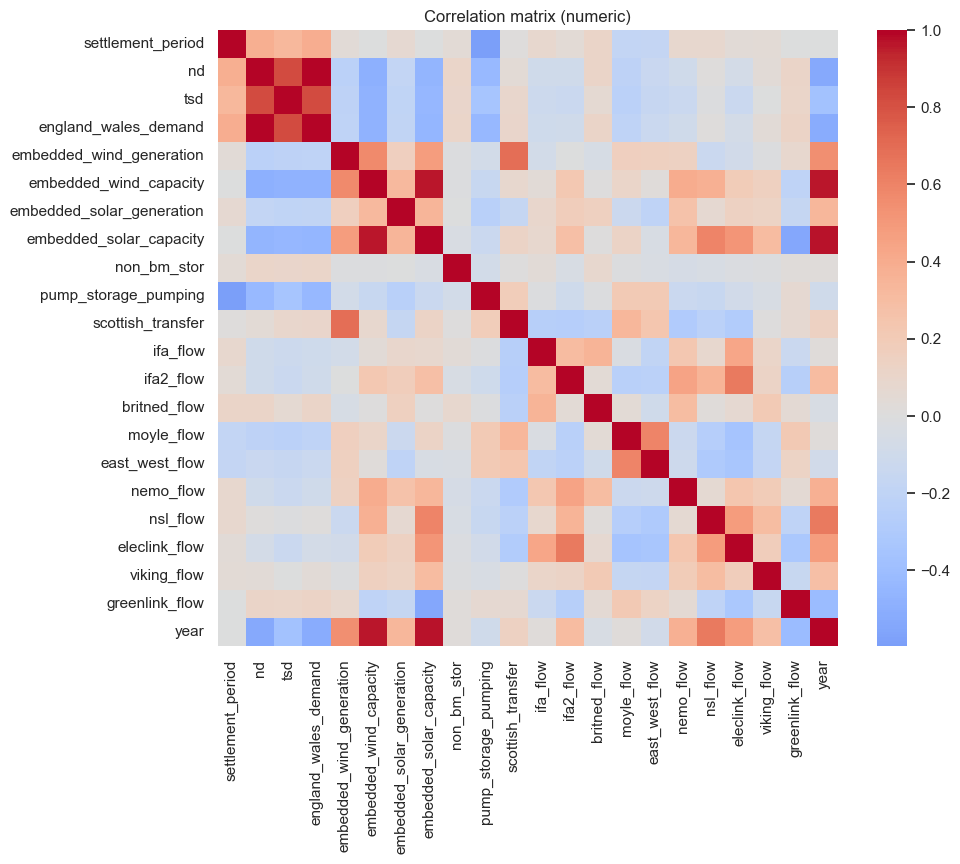

In [9]:
# Correlation heatmap for numeric columns
num = elec.select_dtypes(include=[np.number])
print('numeric columns used:', num.columns.tolist())
corr = num.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='coolwarm', center=0, annot=False, fmt='.2f')
plt.title('Correlation matrix (numeric)')
plt.show()

In [10]:
# Example filling strategies for a column with NaNs (demonstration)
col = 'england_wales_demand'
if col in elec.columns:
    missing_before = elec[col].isna().sum()
    print('missing before:', missing_before)
    # 1) Fill with mean (quick)
    elec_meanfill = elec.copy()
    elec_meanfill[col] = elec_meanfill[col].fillna(elec_meanfill[col].mean())
    # 2) Fill with median (robust)
    elec_medfill = elec.copy()
    elec_medfill[col] = elec_medfill[col].fillna(elec_medfill[col].median())
    # 3) Forward/backward fill by time if settlement_date present
    elec_tfill = elec.sort_values('settlement_date').copy() if 'settlement_date' in elec.columns else elec.copy()
    elec_tfill[col] = elec_tfill[col].fillna(method='ffill').fillna(method='bfill')

    print('after mean fill missing:', elec_meanfill[col].isna().sum())
    print('after median fill missing:', elec_medfill[col].isna().sum())
    print('after time fill missing:', elec_tfill[col].isna().sum())

else:
    print(f'{col} not available to demonstrate fill strategies')

missing before: 0
after mean fill missing: 0
after median fill missing: 0
after time fill missing: 0


/var/folders/br/qhn11dt91tvcg9cqgczhjdlr0000gn/T/ipykernel_2945/799126295.py:14: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  elec_tfill[col] = elec_tfill[col].fillna(method='ffill').fillna(method='bfill')


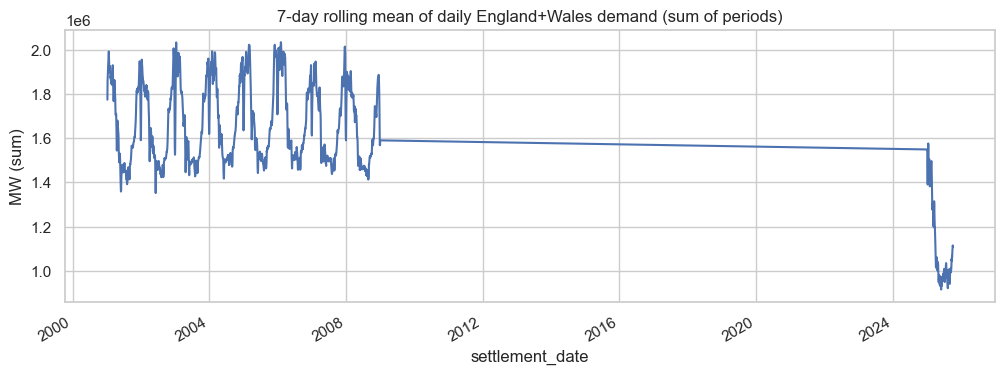

In [11]:
# Quick time-aggregate view: daily sum/mean for England+Wales demand (if present)
if 'settlement_date' in elec.columns and 'england_wales_demand' in elec.columns:
    daily = elec.groupby('settlement_date')['england_wales_demand'].sum().rename('daily_sum')
    plt.figure(figsize=(12,4))
    daily.rolling(7).mean().plot()
    plt.title('7-day rolling mean of daily England+Wales demand (sum of periods)')
    plt.ylabel('MW (sum)')
    plt.show()
else:
    print('not enough columns to produce daily aggregate plot')

In [12]:
# Save cleaned copies (do not overwrite originals)
out_dir = data_dir / 'cleaned'
out_dir.mkdir(exist_ok=True)
elec.to_csv(out_dir / 'electricity_demand_2001_2025_cleaned.csv', index=False)
if price is not None:
    price.to_csv(out_dir / 'price_paid_records_cleaned.csv', index=False)
print('Saved cleaned CSVs to', out_dir)

Saved cleaned CSVs to ../data/cleaned
